In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 

In [2]:
def read_file(file):
    
    
    data=[]

    with open(file,"r") as f:
        text = f.readlines()
        
    
    for line in text:
        data.append(line)
        
    return data

In [3]:
data=read_file("soc-sign-bitcoinalpha.csv")


In [4]:
rating_given_to_others={}

rating_of_user={}

edge_list=[]

In [5]:

i=0

for line in data:
#     print(line)
    
    temp=line.split(",")
    
#     print(temp)
    
    
    source=temp[0]
    
    des=temp[1]
    
    rating=int(temp[2])
    
    edge_list.append((source,des))
    
        
    if (source in rating_given_to_others):
        
        if des not in rating_given_to_others[source]:
                rating_given_to_others[source][des]=rating   
    else:
        
#         print("else 1")
        rating_given_to_others[source]={}
        rating_given_to_others[source][des]=rating
    
    
    if (des in rating_of_user):
        
        if source not in rating_of_user[des]:
                rating_of_user[des][source]=rating   
    else:
        
#         print("else 1")
        rating_of_user[des]={}
        rating_of_user[des][source]=rating
    
    
    i=i+1
    
    
    if(i==7000):
        break

In [6]:
from statistics import mean 

In [7]:
def find_average(rating):
    
#     print(rating.values())
    
    val_list=list(rating.values())
    
#     print(round(mean(val_list)))
    
    return round(mean(val_list))
    

In [8]:
average_user={}

for k,v in rating_of_user.items():
    
    
    
    m_val=find_average(v)
    
#     print(k,m_val)
    
    average_user[k]=m_val
    

In [9]:
def find_fairness(rating):
    
    
    list_rat=list(rating.items())
    
#     print(list_rat)
    
    count=0
    for t in list_rat:
        
        user=t[0]
        rat=t[1]
        
#         print(user,rat,average_user[user])
        
        if (rat>=average_user[user]):
            count=count+1
    
    
    
    
#     print(float(count/len(list_rat)))
    
    r_val=float(count/len(list_rat))
#     if(count/len(list_rat)>0.9):
#         r_val=1
#     else:
#         r_val=0.5
    
    return r_val
    

In [10]:


fair_user={}
i=0

for k,v in rating_given_to_others.items():
    
   
#     print(k,v)
    
    
    fa_val=find_fairness(v)
    
#     print(k,fa_val)
    
    
    fair_user[k]=fa_val
    
    i=i+1
    
    
    if(i==1000):
        break
  

In [11]:
def find_goodness(rating):
    
    
    list_rat=list(rating.items())
    
    count=0
    for t in list_rat:
#         print(t[0],t[1],fair_user[t[0]])

        if t[0] not in fair_user:
            continue

        if(fair_user[t[0]]>0.75):
            count=count+1
    
    
    r_val=float(count/len(list_rat))
    
    
    return r_val
    

In [12]:

goodness_user={}
i=0

for k,v in rating_of_user.items():
    
   
#     print(k,v)
    
    
    go_val=find_goodness(v)
    
    print(k,go_val)
    
    
    goodness_user[k]=go_val
    
    i=i+1
    
    
    if(i==1000):
        break

1 0.23869346733668342
160 1.0
1028 1.0
309 0.6
11 0.17733990147783252
594 1.0
1316 1.0
1392 0.5
1583 1.0
888 1.0
637 1.0
1520 1.0
18 0.10256410256410256
35 0.5714285714285714
1901 1.0
44 0.625
10 0.12195121951219512
783 0.5
821 1.0
112 0.6666666666666666
964 1.0
89 0.75
20 0.20754716981132076
256 0.6666666666666666
223 1.0
1881 1.0
351 1.0
196 0.4
416 1.0
1877 1.0
87 0.5
2367 1.0
3254 0.75
1573 0.5
247 0.6666666666666666
1353 1.0
493 1.0
1358 1.0
1177 1.0
1538 1.0
2296 1.0
222 0.5
2282 1.0
2113 1.0
2260 1.0
71 1.0
142 0.5
2249 1.0
1519 1.0
2227 1.0
1496 1.0
519 0.3333333333333333
1493 0.5
1315 1.0
1750 1.0
156 0.6
9 0.19548872180451127
1724 0.5
22 0.1650485436893204
15 0.0975609756097561
255 0.8
1267 1.0
1261 1.0
57 0.6666666666666666
710 0.8333333333333334
472 1.0
152 1.0
1952 1.0
1606 1.0
379 1.0
4 0.2537313432835821
563 1.0
113 0.5
744 1.0
625 1.0
3422 1.0
3421 1.0
3418 1.0
3402 1.0
250 0.8333333333333334
249 0.6666666666666666
2427 1.0
3414 1.0
1590 0.5
3355 1.0
2305 1.0
1900 1.0
3

In [13]:
user=list(fair_user.keys())
fair_score=list(fair_user.values())




# plot user’s fairness, goodness and reliability score

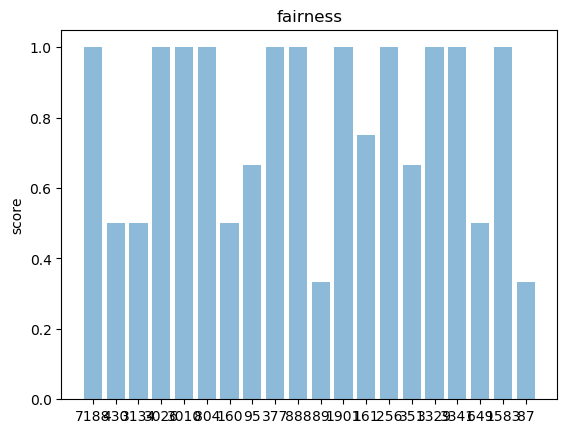

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = user[:20]
y_pos = np.arange(len(objects))
performance = fair_score[:20]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('score')
plt.title('fairness')

plt.show()

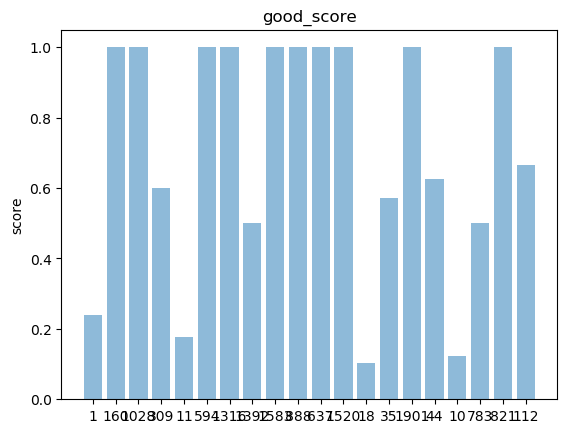

In [15]:
user=list(goodness_user.keys())
good_score=list(goodness_user.values())

objects = user[:20]
y_pos = np.arange(len(objects))
performance = good_score[:20]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('score')
plt.title('good_score')

plt.show()

In [16]:
list_of_user=list(average_user.keys())

In [17]:
fair_user[list_of_user[0]]

0.8673469387755102

In [18]:
goodness_user[list_of_user[0]]

0.23869346733668342

In [19]:
average_user[list_of_user[0]]

2

# interpolate fairness, goodness and reliability score

# 0.6 * fairness * 0.3 * goodness * 0.1 * average

In [20]:
overall_score=[]



user_trust={}


In [21]:
for u in list_of_user:
    
    if u in fair_user:
        tf=fair_user[u]
    if u in goodness_user:
        tg=goodness_user[u]
    if u in average_user:
        ta=average_user[u]
        
    overall_score.append(0.1+(0.6*tf*0.3*tg*0.1*ta))
    user_trust[u]=(0.6*tf*0.3*tg*0.1*ta)
        
    

In [22]:
overall_score

[0.10745308173520665,
 0.19,
 0.163,
 0.11080000000000001,
 0.1022171855662598,
 0.19,
 0.19,
 0.109,
 0.172,
 0.172,
 0.11800000000000001,
 0.1,
 0.10489940828402368,
 0.11542857142857144,
 0.154,
 0.11750000000000001,
 0.10327408019842911,
 0.109,
 0.154,
 0.124,
 0.154,
 0.109,
 0.1131082423038729,
 0.124,
 0.1405,
 0.136,
 0.148,
 0.11080000000000001,
 0.02800000000000001,
 0.136,
 0.10600000000000001,
 0.112,
 0.08987500000000001,
 0.109,
 0.112,
 0.136,
 0.136,
 0.136,
 0.136,
 0.136,
 0.136,
 0.1,
 0.136,
 0.136,
 0.136,
 0.10600000000000001,
 0.1,
 0.136,
 0.136,
 0.136,
 0.136,
 0.10300000000000001,
 0.11800000000000001,
 0.136,
 0.1,
 0.10540000000000001,
 0.10521667805878332,
 0.109,
 0.10469719233796904,
 0.10253163303206636,
 0.09280000000000001,
 0.136,
 0.136,
 0.132,
 0.11,
 0.136,
 0.154,
 0.136,
 0.136,
 0.1,
 0.11121610551891704,
 0.136,
 0.114,
 0.1,
 0.11800000000000001,
 0.1,
 0.1,
 0.1,
 0.1,
 0.10500000000000001,
 0.1,
 0.1,
 0.1,
 0.10600000000000001,
 0.118000

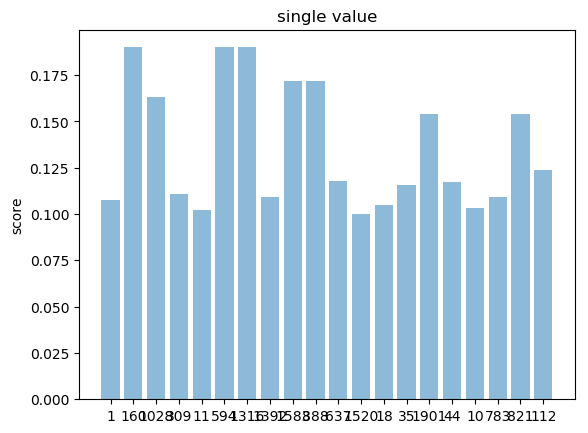

In [23]:


objects = list_of_user[:20]
y_pos = np.arange(len(objects))
performance = overall_score[:20]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('score')
plt.title('single value')

plt.show()

# users who are highly trustable and non-trustable

In [24]:
s = [(k, user_trust[k]) for k in sorted(user_trust, key=user_trust.get, reverse=True)]

In [25]:
i=0;


for t in s:
    print(t[0])
    
    i=i+1
    if(i==10):
        break

312
311
160
594
1316
381
257
1338
423
243


In [26]:
l1=s[-10:]

In [27]:
for t in l1:
    print(t[0])

7484
7506
7417
7505
7566
7601
7537
7534
7564
7410


# strongly connected component from the graph

In [28]:
import networkx as nx

DG=nx.DiGraph()

In [29]:
len(edge_list)


7000

In [30]:

i=0
for t in edge_list:
    print(t)
    
    DG.add_edge(t[0],t[1])
    
    i=i+1
    
#     if(i==10):
# #         DG.add_edge(t[1],t[0])
#         break

('7188', '1')
('430', '1')
('3134', '1')
('3026', '1')
('3010', '1')
('804', '1')
('160', '1')
('95', '1')
('377', '1')
('888', '1')
('89', '1')
('1901', '1')
('161', '1')
('256', '1')
('351', '1')
('3329', '1')
('3341', '1')
('649', '1')
('1583', '1')
('87', '1')
('37', '1')
('309', '1')
('821', '1')
('1496', '1')
('637', '1')
('964', '1')
('594', '1')
('2249', '1')
('554', '1')
('20', '1')
('2227', '1')
('1315', '1')
('519', '1')
('1316', '1')
('2149', '1')
('1724', '1')
('18', '1')
('57', '1')
('118', '1')
('3254', '1')
('1177', '1')
('112', '1')
('11', '1')
('586', '1')
('35', '1')
('15', '1')
('1445', '1')
('152', '1')
('2', '1')
('113', '1')
('44', '1')
('2401', '1')
('10', '1')
('2378', '1')
('126', '1')
('3245', '1')
('783', '1')
('493', '1')
('1358', '1')
('1180', '1')
('529', '1')
('333', '1')
('1538', '1')
('2282', '1')
('1519', '1')
('2966', '1')
('474', '1')
('330', '1')
('958', '1')
('17', '1')
('1295', '1')
('38', '1')
('1952', '1')
('223', '1')
('625', '1')
('1392', '1'

('1819', '5')
('3309', '5')
('310', '5')
('8', '5')
('774', '5')
('695', '5')
('1156', '5')
('280', '5')
('27', '5')
('1909', '5')
('3009', '5')
('462', '5')
('146', '5')
('2386', '5')
('484', '5')
('2354', '5')
('1194', '5')
('2333', '5')
('825', '5')
('1065', '5')
('292', '5')
('1378', '5')
('136', '5')
('93', '5')
('1868', '5')
('336', '5')
('216', '5')
('3254', '5')
('1854', '5')
('1376', '5')
('172', '5')
('692', '5')
('7444', '5')
('1859', '5')
('1832', '5')
('890', '5')
('3236', '5')
('7341', '5')
('988', '5')
('156', '5')
('2363', '5')
('3231', '5')
('2320', '5')
('706', '5')
('1491', '5')
('2335', '5')
('141', '5')
('395', '5')
('203', '5')
('289', '5')
('7531', '5')
('5', '67')
('5', '19')
('5', '8')
('5', '46')
('5', '13')
('5', '248')
('5', '6')
('5', '31')
('5', '53')
('5', '32')
('5', '435')
('5', '191')
('5', '100')
('5', '242')
('5', '68')
('5', '163')
('5', '335')
('5', '174')
('5', '42')
('5', '433')
('5', '59')
('5', '36')
('5', '58')
('5', '982')
('5', '49')
('5', '

('12', '1846')
('12', '1061')
('12', '174')
('12', '1376')
('12', '395')
('12', '1065')
('12', '35')
('12', '1861')
('12', '825')
('12', '116')
('12', '1834')
('12', '1185')
('12', '1350')
('12', '289')
('12', '26')
('12', '97')
('12', '975')
('12', '3234')
('12', '172')
('12', '1187')
('12', '893')
('12', '3232')
('12', '7525')
('12', '33')
('12', '247')
('12', '826')
('1368', '13')
('68', '13')
('3060', '13')
('7337', '13')
('651', '13')
('1050', '13')
('21', '13')
('1052', '13')
('2386', '13')
('7514', '13')
('3119', '13')
('24', '13')
('5389', '13')
('1535', '13')
('701', '13')
('2275', '13')
('1168', '13')
('46', '13')
('177', '13')
('1767', '13')
('1534', '13')
('1529', '13')
('43', '13')
('133', '13')
('650', '13')
('435', '13')
('85', '13')
('965', '13')
('1817', '13')
('3075', '13')
('812', '13')
('2277', '13')
('2284', '13')
('1172', '13')
('1528', '13')
('320', '13')
('7397', '13')
('204', '13')
('599', '13')
('2320', '13')
('1819', '13')
('1813', '13')
('178', '13')
('2283'

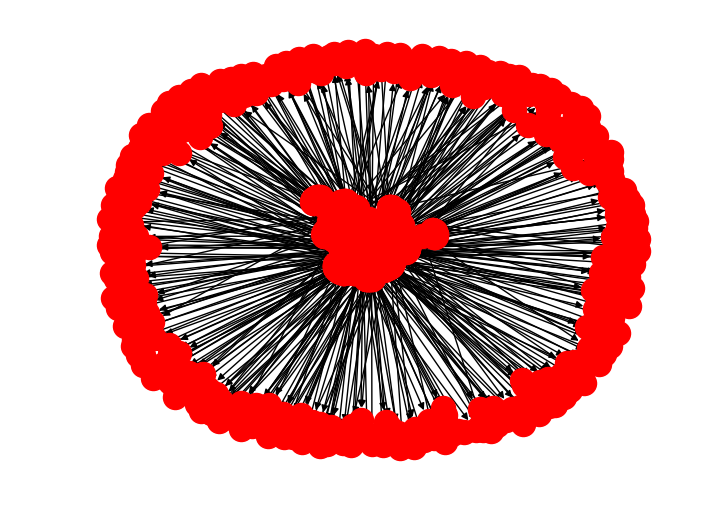

In [31]:
nx.draw(DG, markersize=2) 

In [32]:
temp=list(nx.strongly_connected_components(DG))

In [33]:

max_s=0
max_l=[]
for t in temp:
#     print(len(t))
    if(max_s<len(t)):
        max_s=len(t)
        max_l=t

In [34]:
len(max_l)

1563

# Person A and Person B both has same negative
# score. Person A scored low negative score but from many users unlike
# Person B who has less degree compared to A but high negative score.
# Which person according to you can’t be trusted.

We can look for common fair(users) score and then decide whow we need to trust

We can look for goodness value of user based on indegree of node with faireness

We can build model for recent behaviour of user then decide

# similar inferences using plots

If we see strogly conected componenets transaction their average goodness and fairness may be high since they participate among themselves. so,contribution of user from same component should be given less proportion compared to rating from outside